In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Stammdaten.csv", low_memory=False)

In [3]:
df.shape

(186756, 25)

In [4]:
df.columns

Index(['Materialnummer', 'Lieferant OB', 'Vertrag OB', 'Vertragsposition OB',
       'Planlieferzeit Vertrag', 'Vertrag Fix1', 'Vertrag_Fix2',
       'Beschaffungsart', 'Sonderbeschaffungsart', 'Disponent', 'Einkäufer',
       'DispoGruppe', 'Dispolosgröße', 'Gesamtbestand', 'Gesamtwert',
       'Preiseinheit', 'Kalender', 'Werk OB', 'Werk Infosatz',
       'Infosatznummer', 'Infosatztyp', 'WE-Bearbeitungszeit',
       'Planlieferzeit Mat-Stamm', 'Warengruppe', 'Basiseinheit'],
      dtype='object')

In [6]:
df.tail(10)

,Materialnummer,Lieferant OB,Vertrag OB,Vertragsposition OB,Planlieferzeit Vertrag,Vertrag Fix1,Vertrag_Fix2,Beschaffungsart,Sonderbeschaffungsart,Disponent,...,Preiseinheit,Kalender,Werk OB,Werk Infosatz,Infosatznummer,Infosatztyp,WE-Bearbeitungszeit,Planlieferzeit Mat-Stamm,Warengruppe,Basiseinheit
186746,00347834,708038,5.500007e+09,10,14,14,84,F,NaN,715,...,1,E11,2000,NaN,5.300180e+09,0.0,1,84,80100000,ST
186747,00347838,708038,5.500007e+09,10,14,14,84,F,NaN,715,...,1,E11,2000,NaN,5.300180e+09,0.0,1,84,80100000,ST
186748,00347903,708038,5.500007e+09,10,14,14,84,F,NaN,715,...,1,E11,2000,NaN,5.300190e+09,0.0,1,84,80100000,ST
186749,00347903,708038,5.500007e+09,10,14,14,84,F,NaN,715,...,1,E11,2100,NaN,5.300190e+09,0.0,1,84,80100000,ST
186750,00347963,708038,5.500007e+09,10,14,14,84,F,NaN,715,...,1,E11,2100,NaN,5.300193e+09,0.0,1,84,80100000,ST
186751,04005946,704947,4.600012e+09,10,63,0,0,F,NaN,272,...,100,NaN,3000,NaN,5.300123e+09,0.0,1,63,80400000,ST
186752,00371028,700020,5.500005e+09,10,4,4,60,F,NaN,272,...,100,NaN,3000,NaN,5.300134e+09,0.0,1,7,140300000,ST
186753,00371059,701806,5.500005e+09,10,4,4,60,F,NaN,272,...,100,E99,3000,NaN,5.300153e+09,0.0,1,21,140300000,ST
186754,00350881,701806,5.500005e+09,10,4,4,60,F,NaN,272,...,100,NaN,3000,NaN,5.300176e+09,0.0,1,7,140200000,ST
186755,00360733,701806,5.500008e+09,10,4,4,60,F,NaN,272,...,100,E13,3000,NaN,5.300185e+09,0.0,1,7,140100000,ST


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD


# Assuming `df` is your DataFrame with the shape (186756, 25)

# Step 1: Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Create transformers for the preprocessing pipeline
# For numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Step 3: Combine transformers with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the transformations
X_processed = preprocessor.fit_transform(df)

# Step 4: Apply PCA and reduce to 2 dimensions for visualization
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_processed)

# Use TruncatedSVD instead of PCA
svd = TruncatedSVD(n_components=4)
X_svd = svd.fit_transform(X_processed)



"# Plot the first two principal components\nplt.figure(figsize=(8, 6))\nplt.scatter(X_svd[:, 0], X_svd[:, 1], alpha=0.2)\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA - First two principal components after encoding and scaling')\nplt.show()"

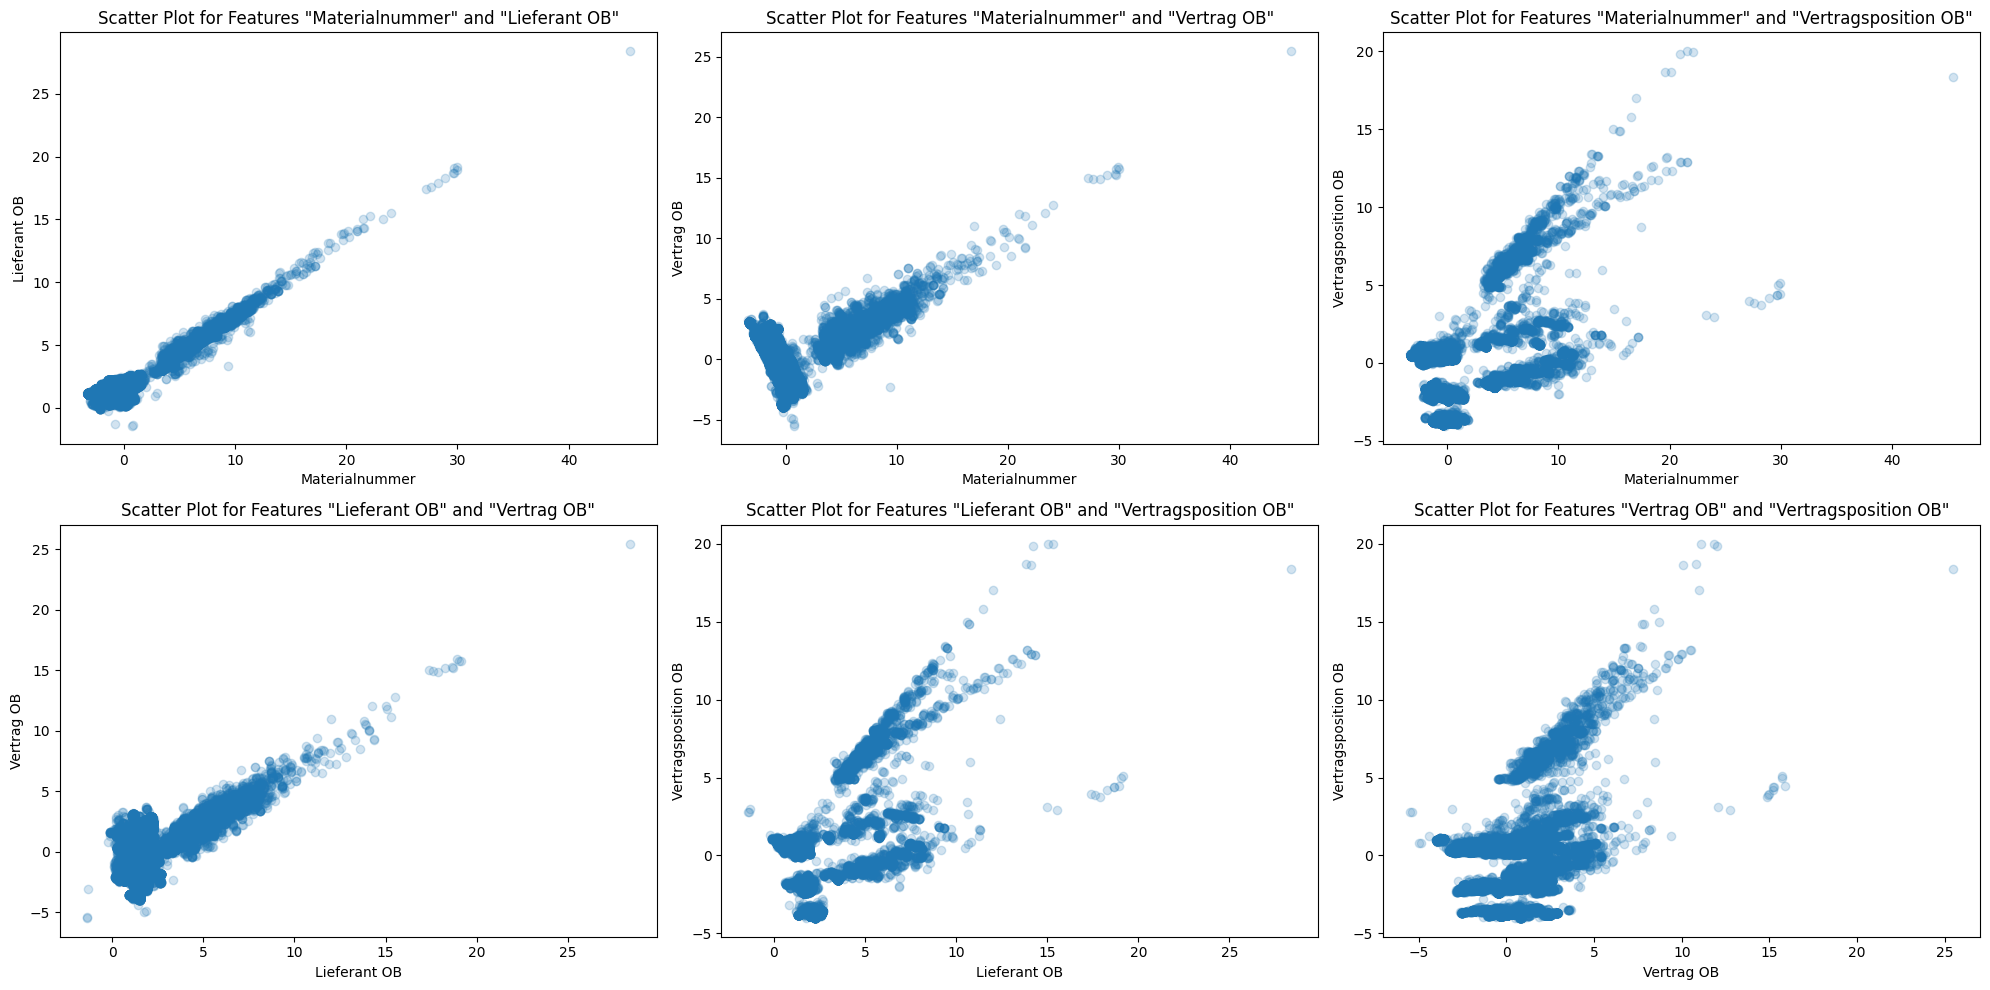

In [7]:
import itertools

num_cols = X_svd.shape[1]
column_names = df.columns.tolist()

# Define number of columns in subplot
cols_subplot = 3
rows_subplot = (num_cols - 1) // cols_subplot + 1

# Create a subplot grid
fig, axs = plt.subplots(rows_subplot, cols_subplot, figsize=(20, 5 * rows_subplot))

# Flatten the axs array if it's not already flat
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

# Plot individual scatter plots for pairs of features
for i, (col1, col2) in enumerate(itertools.combinations(range(num_cols), 2)):
    row = i // cols_subplot
    col = i % cols_subplot
    axs[row, col].scatter(X_svd[:, col1], X_svd[:, col2], alpha=0.2)
    axs[row, col].set_xlabel(column_names[col1])
    axs[row, col].set_ylabel(column_names[col2])
    axs[row, col].set_title('Scatter Plot for Features "{}" and "{}"'.format(column_names[col1], column_names[col2]))

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Assuming `df` is your DataFrame with the shape (186756, 25)

# Step 1: Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Step 2: Create transformers for the preprocessing pipeline
# For numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Step 3: Combine transformers with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the transformations
X_processed = preprocessor.fit_transform(df)

# Step 4: Apply TruncatedSVD with 25 components
svd = TruncatedSVD(n_components=25)
X_svd = svd.fit_transform(X_processed)

# Optionally, you can also print the explained variance ratio to understand how much variance is preserved by each component
print("Explained Variance Ratio:", svd.explained_variance_ratio_)

# You can use X_svd for further analysis or visualization


Explained Variance Ratio: [0.12110062 0.02778487 0.0929937  0.09063536 0.06467407 0.05870315
 0.04775247 0.04717162 0.04485403 0.04389826 0.03991637 0.03587904
 0.03498145 0.02981188 0.02028752 0.0166512  0.01267898 0.01024804
 0.00783813 0.00642434 0.00613658 0.00581927 0.00463227 0.0042916
 0.00380683]


IndexError: index 9 is out of bounds for axis 0 with size 9

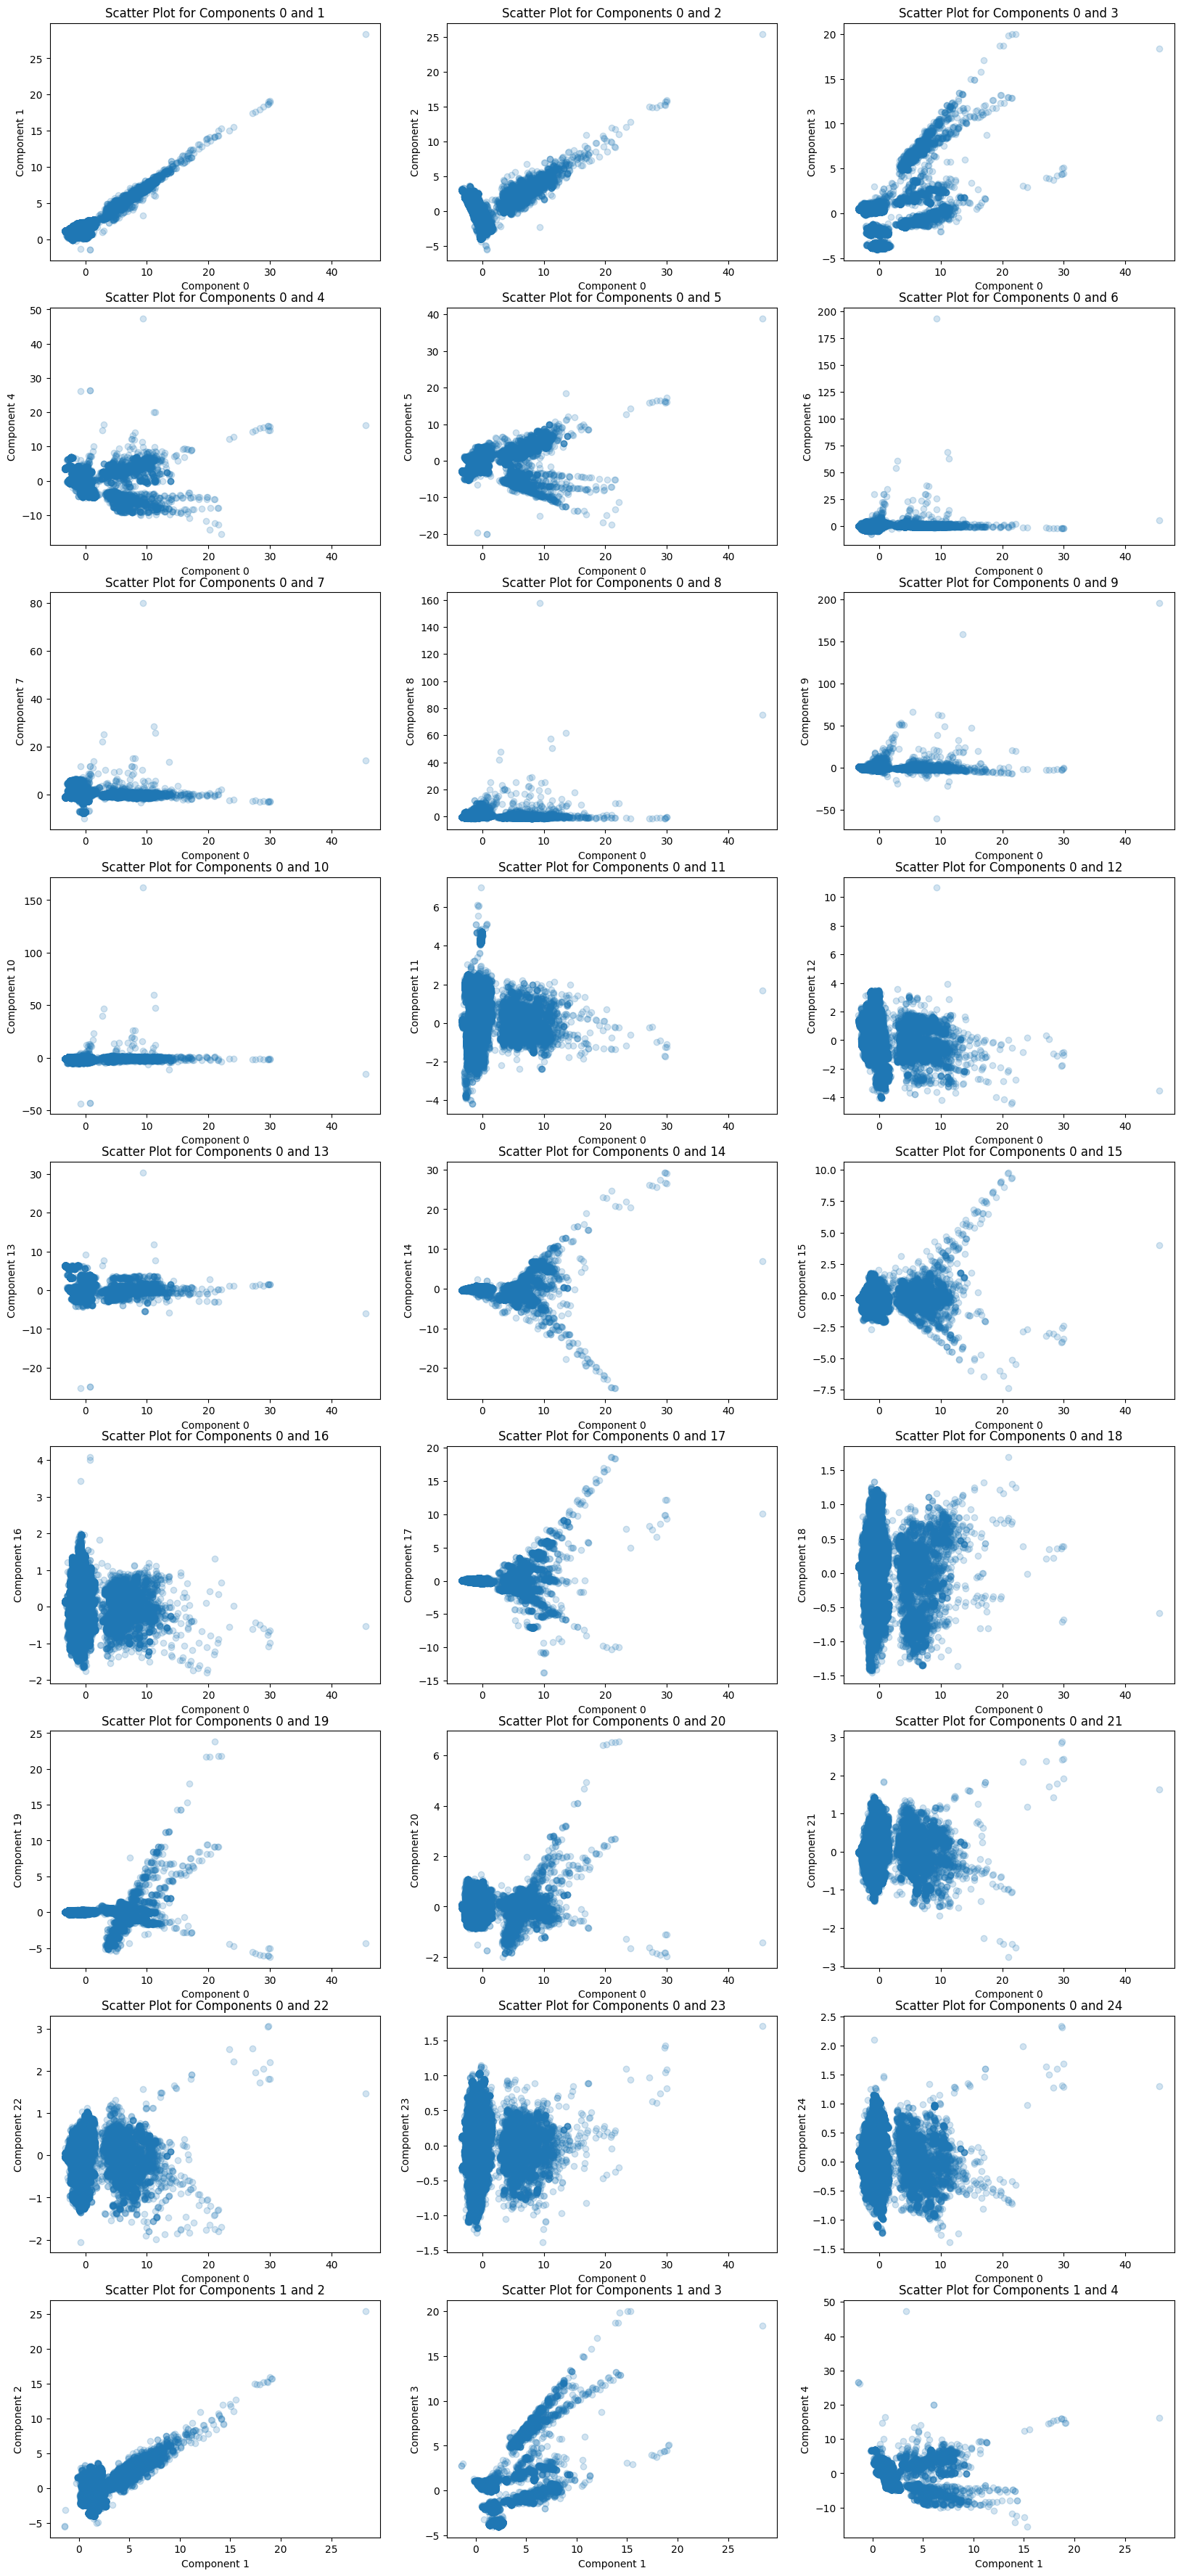

In [8]:
import itertools
import numpy as np  # Don't forget to import numpy

num_cols = X_svd.shape[1]
column_names = df.columns.tolist()

# Define number of columns in subplot
cols_subplot = 3  # Adjust the number of columns per subplot as needed
rows_subplot = (num_cols - 1) // cols_subplot + 1

# Create a subplot grid
fig, axs = plt.subplots(rows_subplot, cols_subplot, figsize=(20, 5 * rows_subplot))

# Flatten the axs array if it's not already flat
if not isinstance(axs, np.ndarray):
    axs = np.array([axs])

# Plot individual scatter plots for pairs of features
for i, (col1, col2) in enumerate(itertools.combinations(range(num_cols), 2)):
    row = i // cols_subplot
    col = i % cols_subplot
    axs[row, col].scatter(X_svd[:, col1], X_svd[:, col2], alpha=0.2)
    axs[row, col].set_xlabel("Component {}".format(col1))
    axs[row, col].set_ylabel("Component {}".format(col2))
    axs[row, col].set_title('Scatter Plot for Components {} and {}'.format(col1, col2))

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
print(num_cols)

25


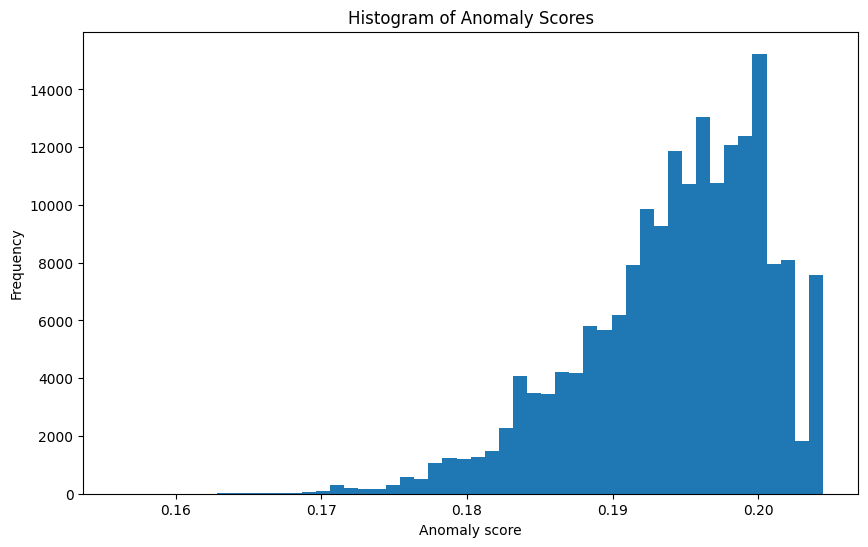

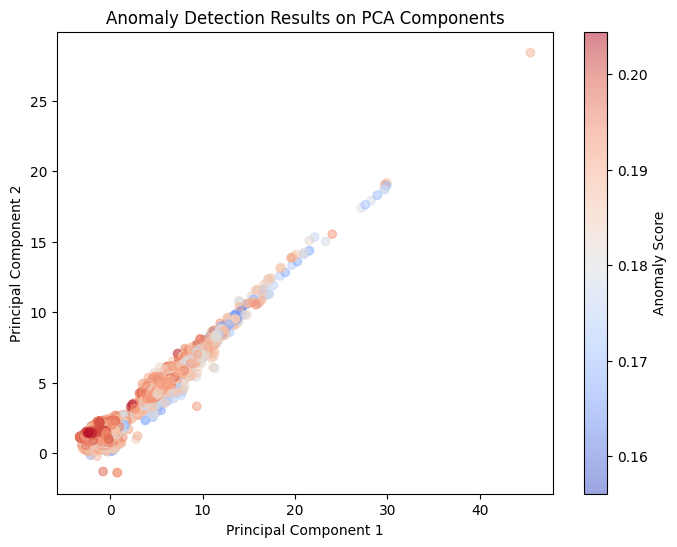

In [9]:
# Apply Isolation Forest for anomaly detection
clf = IsolationForest(random_state=42)
clf.fit(X_processed)

# Predict anomalies (-1 for outliers and 1 for inliers)
y_pred = clf.predict(X_processed)

# Visualize the anomaly scores
scores = clf.decision_function(X_processed)

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=50)
plt.title('Histogram of Anomaly Scores')
plt.xlabel('Anomaly score')
plt.ylabel('Frequency')
plt.show()

# Optionally, visualize where anomalies are in your PCA-reduced dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=scores, cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Anomaly Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection Results on PCA Components')
plt.show()